# IG3模型处理学生考勤数据

# 1. 学生考勤数据整理

1.1 将老师课堂上的考勤数据整理为txt格式(‘studentsData.txt’)，txt内容截图如下：

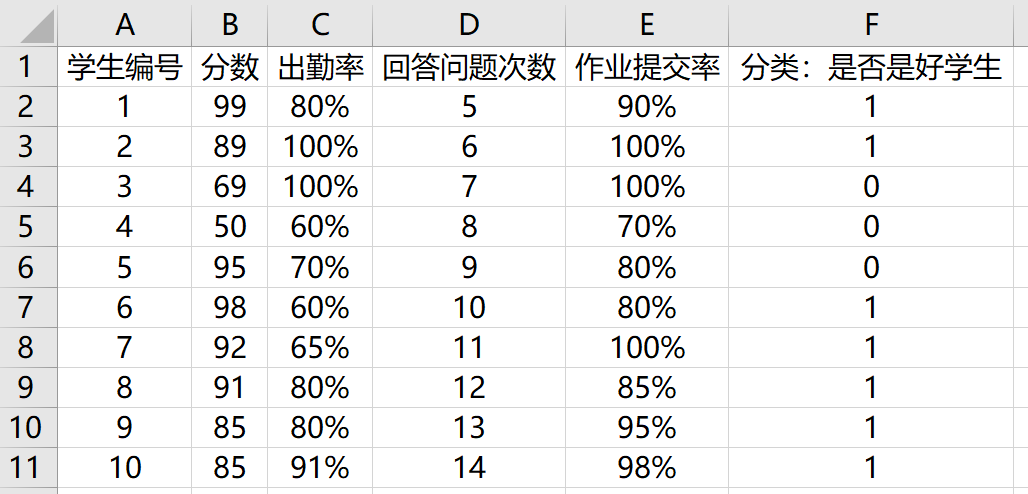

# 2. 手写代码实现IG3

In [182]:
from math import log
import operator
import numpy as np
import matplotlib.pyplot as plt
import random

In [183]:
# 读取并处理数据
def file2matrix(filename, featureNum):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines,featureNum))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()  #截取掉所有的回车字符
        listFromLine = line.split('\t')  #根据'\t'进行分割，成为元素列表       
        returnMat[index,0:featureNum] = listFromLine[0:featureNum]
        classLabelVector.append((listFromLine[-1]))
        index += 1
    dataMat = returnMat.tolist()
    return dataMat, classLabelVector

In [184]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['simHei']  #指定默认字体 能解决中文不能正常显示的问题
#plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号‘-’显示为方块的问题

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leftNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',\
                            xytext=centerPt, textcoords='axes fraction',\
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)


def createPlot(inTree):
    """
    创建树形图
    :return:返回一棵树形的图片
    """
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    # plotNode('决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
    # plotNode('叶节点', (0.8, 0.1), (0.3, 0.8), leftNode)
    plt.show()


def plotMidText(cntrPt, parentPt, txtString):
    """
    在父子节点间填充信息
    :param cntrPt:
    :param parentPt:
    :param txtString:
    :return:
    """
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)


def plotTree(myTree, parentPt, nodeTxt):
    """
    计算宽与高，绘制图
    :param myTree:
    :param parentPt:
    :param nodeTxt:
    :return:
    """
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW,
              plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt,
                     leftNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD


def getNumLeafs(myTree):
    """
    获取叶节点数目
    :param myTree:
    :return:
    """
    numLeafs = 0
    # myTree.keys()不转换list将报错 -> TypeError: 'dict_keys' object does not support indexing
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1

    return numLeafs


def getTreeDepth(myTree):
    """
    树的层数
    :param myTree:
    :return:
    """
    maxDepth = 1
    # myTree.keys()不转换list将报错 -> TypeError: 'dict_keys' object does not support indexing
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1

        if thisDepth > maxDepth:
            maxDepth = thisDepth

    return maxDepth


def retriveTree(i):
    """
    预存树信息
    :param i:
    :return:
    """

    listOfTree = [{
        'no surfacing': {
            0: 'no',
            1: {
                'flippers': {
                    0: 'no',
                    1: 'yes'
                }
            }
        }
    }, {
        'no surfacing': {
            0: 'no',
            1: {
                'flippers': {
                    0: {
                        'head': {
                            0: 'no',
                            1: 'yes'
                        }
                    },
                    1: 'no'
                }
            }
        }
    }]
    return listOfTree[i]

    

In [185]:
def calShannonEnt(dataSet):
    """
    计算给定数据集的香农熵 公式: H = -Σ(n,i=1)p(xi)log2p(xi),其中p(xi)是选择该分类的概率
    :param dataSet: 数据集
    :return: 返回熵
    """
    numEntries = len(dataSet)#求数据长度
    labelCounts = {}#用字典来统计标签
    for featVec in dataSet:
        currentLabel = featVec[-1] #标签放在最后一个
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1

    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)

    return shannonEnt

In [186]:
def spliteDataSet(dataSet, axis, value):
    """
    按给定特征划分数据集
    :param dataSet:数据集
    :param axis:需划分值在一条数据中的下标
    :param value:划分值
    :return:返回所有下标所指数据与value相同的数据集
    """
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return  retDataSet

In [187]:
def chooseBestFeatureToSplit(dataSet):
    """
    选择最好的数据集划分方式
    :param dataSet:数据集
    :return:返回最佳分割位置
    """
    #计算属性长度
    numFeatures = len(dataSet[0])-1
    #未划分前的熵值
    baseEntropy = calShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        #获取当前属性所有取值
        featList = [example[i] for example in dataSet]
        #去掉属性中重复的取值
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            #求得每种划分的信息熵
            subDataSet = spliteDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i

    return bestFeature

In [188]:
def majorityCnt(classList):
    """
    返回出现频率最高的分类名称
    :param classList:
    :return:
    """
    classCnt = {}
    for vote in classList:
        if vote not in classCnt.keys(): classCnt[vote] = 0
        classCnt[vote] += 1

    sortedClassCnt = sorted(classCnt.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCnt[0][0]

In [189]:
def creatTree(dataSet,labels):
    """
    创建树的函数代码
    :param dataSet:数据集合
    :param labels:特征值集合
    :return:一棵决策树
    """
    #获取属性取值集合
    classList = [example[-1] for example in dataSet]
    print("classList:")
    print(classList)
    print("labels:")
    print(labels)
    #当前列表中都属于同一个值，类别完全相同停止继续划分
    if classList.count(classList[0]) == len(classList):
        print("all items equals:")
        print(classList)
        return classList[0]

    if len(dataSet[0]) == 1:
        print("dataSet:")
        print(dataSet)
        print("dataSet[0]:")
        print(dataSet[0])
        return majorityCnt(classList)

    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:] #复制类标签
        myTree[bestFeatLabel][value] = creatTree(spliteDataSet(dataSet, bestFeat, value), subLabels)

    return myTree

In [190]:
def classify(inputTree, featLabels, testVec):
    """
    使用决策树来分类
    :param inputTree:决策树
    :param featLabels:特征表
    :param testVec:测试向量，即问题集合
    :return:返回最终的决策结果
    """
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    print("firstStr:"+firstStr)
    # print("featLabels:"+str(featLabels))
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [191]:
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'w')
    pickle.dump(inputTree, fw)
    fw.close()

In [192]:
def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

In [193]:
# 随机划分训练集和测试集
def dataSeperate(X, testRatio):
    dataNumber = len(X)  # 数据集数据条数
    testNumber = int(dataNumber * testRatio)  # 测试集数据条数
    X_test = [] 
    X_train = []
    randIndex = random.sample(range(dataNumber), testNumber)
    for i in randIndex:
        X_test.append(X[i])
    for n in range(dataNumber):
        if n not in randIndex:
            X_train.append(X[n])
    return X_train, X_test
    

In [194]:
#创建数据集
#X, Y = file2matrix('studentsData.txt',4)
dataPath = '../../data/studentsData_for_ID3.txt'
fr = open(dataPath)
X = [inst.strip().split('\t') for inst in fr.readlines()]
X_train, X_test = dataSeperate(X, 0.3)
X_name = ['成绩','出勤率','回答问题次数','作业提交率']
Y_name=['好学生','差学生']
fr.close()
print(X_train)
print(Y_name)

[['99', '0.80 ', '5', '0.9', '好学生'], ['89', '1.00 ', '6', '1', '好学生'], ['50', '0.60 ', '8', '0.7', '差学生'], ['92', '0.65 ', '11', '1', '好学生'], ['91', '0.80 ', '12', '0.85', '好学生'], ['85', '0.80 ', '13', '0.95', '好学生'], ['85', '0.91 ', '14', '0.98', '好学生']]
['好学生', '差学生']


In [195]:
#复制一份，防止改变该变量
Y_name_copy = Y_name.copy()

In [196]:
#创建决策树 实际上是一个字典集合
myTree = creatTree(X, Y_name)
print(myTree)

classList:
['好学生', '好学生', '差学生', '差学生', '差学生', '好学生', '好学生', '好学生', '好学生', '好学生']
labels:
['好学生', '差学生']
classList:
['好学生']
labels:
['差学生']
all items equals:
['好学生']
classList:
['差学生']
labels:
['差学生']
all items equals:
['差学生']
classList:
['好学生']
labels:
['差学生']
all items equals:
['好学生']
classList:
['好学生']
labels:
['差学生']
all items equals:
['好学生']
classList:
['好学生', '好学生']
labels:
['差学生']
all items equals:
['好学生', '好学生']
classList:
['差学生']
labels:
['差学生']
all items equals:
['差学生']
classList:
['好学生']
labels:
['差学生']
all items equals:
['好学生']
classList:
['差学生']
labels:
['差学生']
all items equals:
['差学生']
classList:
['好学生']
labels:
['差学生']
all items equals:
['好学生']
{'好学生': {'89': '好学生', '69': '差学生', '92': '好学生', '99': '好学生', '85': '好学生', '95': '差学生', '91': '好学生', '50': '差学生', '98': '好学生'}}


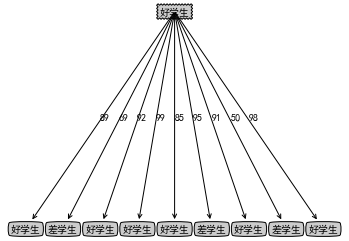

In [197]:
#根据创建的决策树进行绘图
createPlot(myTree)

# 3. 调库实现ID3

In [199]:
from sklearn import tree
from sklearn import datasets,model_selection

In [200]:
X, Y = file2matrix('studentsData_for_DecisionTree.txt',4)
print(X)
print(Y)

[[99.0, 0.8, 5.0, 0.9], [89.0, 1.0, 6.0, 1.0], [69.0, 1.0, 7.0, 1.0], [50.0, 0.6, 8.0, 0.7], [95.0, 0.7, 9.0, 0.8], [98.0, 0.6, 10.0, 0.8], [92.0, 0.65, 11.0, 1.0], [91.0, 0.8, 12.0, 0.85], [85.0, 0.8, 13.0, 0.95], [85.0, 0.91, 14.0, 0.98]]
['好学生', '好学生', '差学生', '差学生', '差学生', '好学生', '好学生', '好学生', '好学生', '好学生']


In [201]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X, Y,test_size=0.3,random_state=0,stratify=Y)
print(X_train)
print(y_train)

[[92.0, 0.65, 11.0, 1.0], [98.0, 0.6, 10.0, 0.8], [89.0, 1.0, 6.0, 1.0], [69.0, 1.0, 7.0, 1.0], [95.0, 0.7, 9.0, 0.8], [85.0, 0.91, 14.0, 0.98], [99.0, 0.8, 5.0, 0.9]]
['好学生', '好学生', '好学生', '差学生', '差学生', '好学生', '好学生']


In [202]:
maxdepth = 40
depths=np.arange(1,maxdepth)
training_scores=[]
testing_scores=[]

In [203]:
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth,criterion='entropy')
    clf.fit(X_train, y_train)
    training_scores.append(clf.score(X_train,y_train))
    testing_scores.append(clf.score(X_test,y_test))

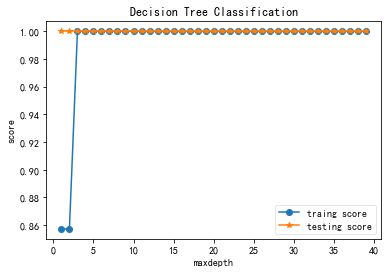

In [204]:
## 绘图
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(depths,training_scores,label="traing score",marker='o')
ax.plot(depths,testing_scores,label="testing score",marker='*')
ax.set_xlabel("maxdepth")
ax.set_ylabel("score")
ax.set_title("Decision Tree Classification")
ax.legend(framealpha=0.5,loc='best')
plt.show()

In [205]:
from sklearn.tree import export_graphviz
# dot -Tpng <filename> -o <outfilename>
# remember to add node[fontname="Microsoft YaHei"]; in .dot
X_name=['成绩', '出勤率', '回答问题次数', '作业提交率']
Y_name=['好学生','差学生']
with open('./studentsData_for_DecisionTree.dot','w',encoding='utf-8') as f:
    f=export_graphviz(clf,feature_names=X_name,class_names=Y_name,out_file=f)

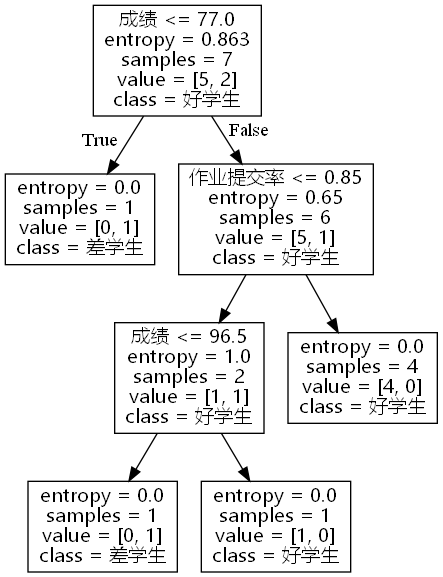